In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import ast

In [2]:
# df = pd.read_csv("../simulation_results.csv", sep=',', 
#                   names=["Patient ID", "CTAS Level", 
#                          "Arrival Time", "Departure Time", "LOS",
#                          "Triage Waiting Time", "ED Waiting Time",
#                          "Medication Waiting Time", "Inpatient Waiting Time", 
#                          "Triage Waiting Room Length", "ED Waiting Room Length",
#                          "Medication Waiting Room Length", "Inpatient Waiting Room Length"
#                         ])

In [3]:
df = pd.read_csv("../simulation_results.csv", sep=r",(?![^\[]*\])")

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_9013/3152665141.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../simulation_results.csv", sep=r",(?![^\[]*\])")


In [4]:
# df[1000:1010]
df[:10]

,Patient ID,CTAS Level,Tests,Arrival Time,Departure Time,LOS,Triage Waiting Time,ED Waiting Time,Medication Waiting Time,Inpatient Waiting Time,Triage Waiting Room Length,ED Waiting Room Length,Medication Waiting Room Length,Inpatient Waiting Room Length
0,1,1,"['ED Blood Test', 'ED CT']",0.000000,78.827457,78.827457,0.0,0.0,0.000000,0.0,1,1,11,1
1,2,4,"['Triage ECG', 'Triage X-Ray']",0.365564,97.788749,97.423185,0.0,0.0,2.262172,0.0,1,1,11,1
2,3,0,[],1.462743,0.000000,-1.462743,0.0,0.0,0.000000,0.0,1,1,11,1
3,4,0,[],1.532924,0.000000,-1.532924,0.0,0.0,0.000000,0.0,1,1,11,1
4,5,1,['ED Blood Test'],1.899614,26.452849,24.553235,0.0,0.0,0.000000,0.0,1,1,11,1
5,6,1,['ED CT'],2.768536,74.632657,71.864122,0.0,0.0,0.000000,0.0,1,1,11,1
6,7,3,"['Triage ECG', 'Triage Urine']",2.991550,97.550250,94.558700,0.0,0.0,2.375370,0.0,1,1,11,1
7,8,1,"['ED Blood Test', 'ED CT']",3.118041,78.803705,75.685664,0.0,0.0,0.000000,0.0,1,1,11,1
8,9,3,"['Triage ECG', 'Triage Urine']",3.435579,90.017273,86.581694,0.0,0.0,2.231079,0.0,1,1,11,1
9,10,1,[],3.808014,14.799107,10.991093,0.0,0.0,0.000000,0.0,1,1,11,1


In [5]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['Patient ID', 'CTAS Level', 'Tests', 'Arrival Time', 'Departure Time',
       'LOS', 'Triage Waiting Time', 'ED Waiting Time',
       'Medication Waiting Time', 'Inpatient Waiting Time',
       'Triage Waiting Room Length', 'ED Waiting Room Length',
       'Medication Waiting Room Length', 'Inpatient Waiting Room Length'],
      dtype='object')

In [6]:
los_vals = []

for items in df["LOS"]:
    if items > 0:
        los_vals.append(items)
        
print(len(los_vals))

52572


In [7]:
# for items in df["Tests"]:
#     items = ast.literal_eval(items)
#     if len(items) > 1:
#         print(items)

In [8]:
# los_vals.sort()
# print(los_vals)

In [9]:
print(min(los_vals), max(los_vals))

6.677782860009756 301.3974160948492


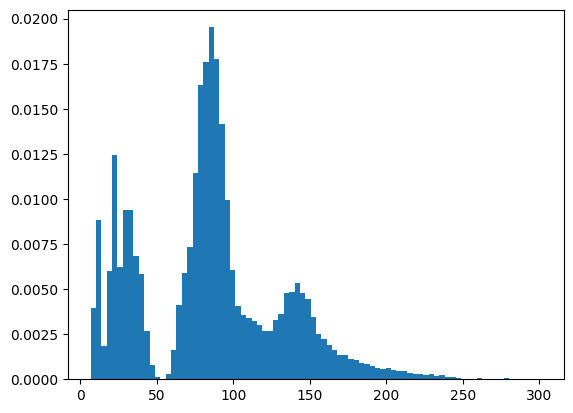

In [10]:
plt.hist(los_vals, density=True, bins="auto")
plt.show()

In [11]:
los_vals_ctas_i_iii = []
los_vals_ctas_iv_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) in [1, 2, 3]:
            los_vals_ctas_i_iii.append(los)
        elif int(ctas) in [4, 5]:
            los_vals_ctas_iv_v.append(los)
        
print(len(los_vals_ctas_i_iii), len(los_vals_ctas_iv_v))

35357 17215


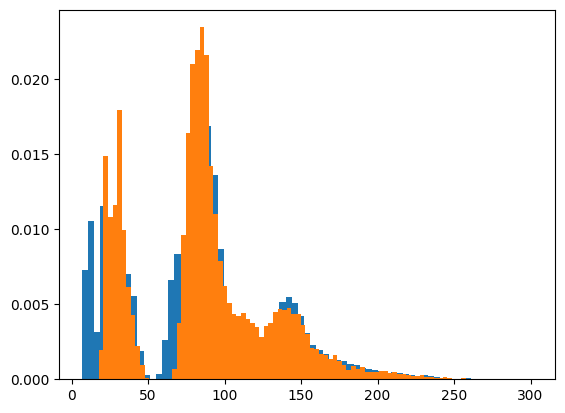

In [12]:
plt.hist(los_vals_ctas_i_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv_v, density=True, bins="auto")
plt.show()

In [13]:
los_vals = [x/60 for x in los_vals]
ecdf = sm.distributions.ECDF(los_vals)

In [14]:
x = np.linspace(min(los_vals), max(los_vals), num=len(los_vals))
# Evaluate the CDF at each x-value
y = ecdf(x)

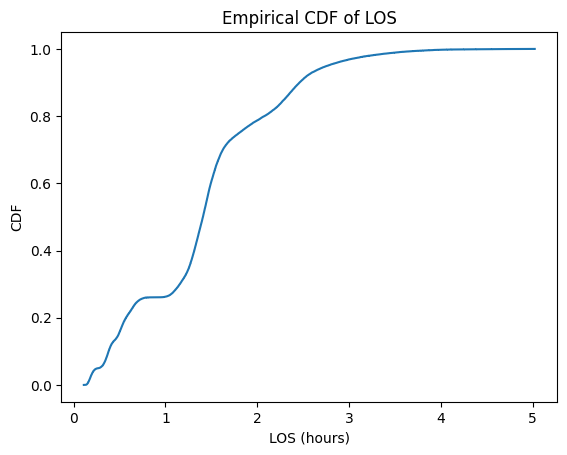

In [15]:
plt.step(x, y)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [16]:
los_vals_ctas_i = []
los_vals_ctas_ii = []
los_vals_ctas_iii = []
los_vals_ctas_iv = []
los_vals_ctas_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) == 1:
            los_vals_ctas_i.append(los)
        elif int(ctas) == 2:
            los_vals_ctas_ii.append(los)
        elif int(ctas) == 3:
            los_vals_ctas_iii.append(los)
        elif int(ctas) == 4:
            los_vals_ctas_iv.append(los)
        elif int(ctas) == 5:
            los_vals_ctas_v.append(los)
        
print(len(los_vals_ctas_i), len(los_vals_ctas_ii), len(los_vals_ctas_iii), 
      len(los_vals_ctas_iv), len(los_vals_ctas_v))

17779 8841 8737 8533 8682


In [17]:
avg_los_ctas_i = sum(los_vals_ctas_i)/len(los_vals_ctas_i)
avg_los_ctas_ii = sum(los_vals_ctas_ii)/len(los_vals_ctas_ii)
avg_los_ctas_iii = sum(los_vals_ctas_iii)/len(los_vals_ctas_iii)
avg_los_ctas_iv = sum(los_vals_ctas_iv)/len(los_vals_ctas_iv)
avg_los_ctas_v = sum(los_vals_ctas_v)/len(los_vals_ctas_v)

print(avg_los_ctas_i/60, avg_los_ctas_ii/60, avg_los_ctas_iii/60, avg_los_ctas_iv/60, avg_los_ctas_v/60)

1.1724133827943193 1.6345173854630841 1.6321858936412128 1.6389910646595733 1.2785759999526816


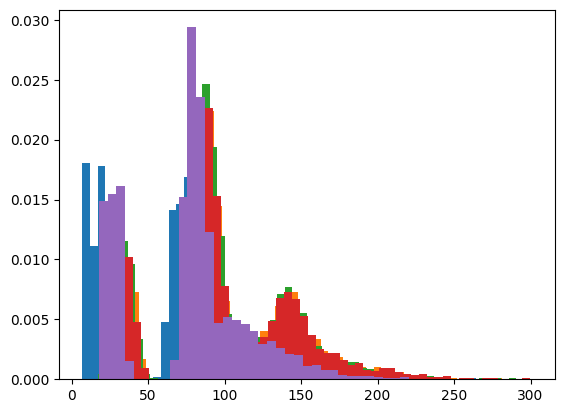

In [18]:
plt.hist(los_vals_ctas_i, density=True, bins="auto")
plt.hist(los_vals_ctas_ii, density=True, bins="auto")
plt.hist(los_vals_ctas_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv, density=True, bins="auto")
plt.hist(los_vals_ctas_v, density=True, bins="auto")
plt.show()

In [19]:
los_vals_i = [x for x in los_vals_ctas_i]
los_vals_ii = [x for x in los_vals_ctas_ii]
los_vals_iii = [x for x in los_vals_ctas_iii]
los_vals_iv = [x for x in los_vals_ctas_iv]
los_vals_v = [x for x in los_vals_ctas_v]

ecdf_i = sm.distributions.ECDF(los_vals_i)
ecdf_ii = sm.distributions.ECDF(los_vals_ii)
ecdf_iii = sm.distributions.ECDF(los_vals_iii)
ecdf_iv = sm.distributions.ECDF(los_vals_iv)
ecdf_v = sm.distributions.ECDF(los_vals_v)

In [20]:
x_i = np.linspace(min(los_vals_i), max(los_vals_i), num=len(los_vals_i))
x_ii = np.linspace(min(los_vals_ii), max(los_vals_ii), num=len(los_vals_ii))
x_iii = np.linspace(min(los_vals_iii), max(los_vals_iii), num=len(los_vals_iii))
x_iv = np.linspace(min(los_vals_iv), max(los_vals_iv), num=len(los_vals_iv))
x_v = np.linspace(min(los_vals_iv), max(los_vals_v), num=len(los_vals_v))

# Evaluate the CDF at each x-value
y_i = ecdf(x_i)
y_ii = ecdf(x_ii)
y_iii = ecdf(x_iii)
y_iv = ecdf(x_iv)
y_v = ecdf(x_v)

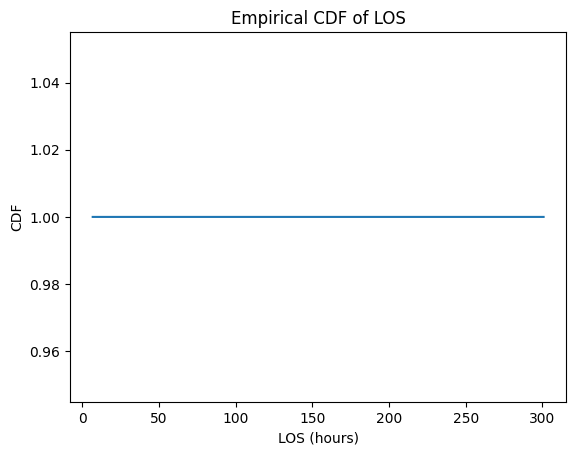

In [21]:
plt.step(x_i, y_i)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

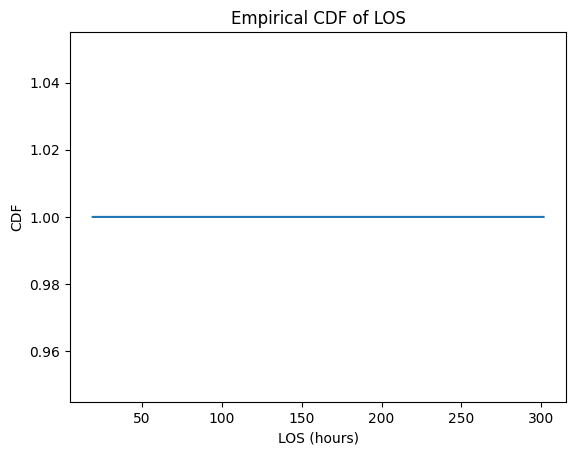

In [22]:
plt.step(x_ii, y_ii)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [ ]:
plt.step(x_iii, y_iii)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [ ]:
plt.step(x_iv, y_iv)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()

In [ ]:
plt.step(x_v, y_v)
plt.xlabel('LOS (hours)')
plt.ylabel('CDF')
plt.title('Empirical CDF of LOS')
plt.show()